In [103]:
import numpy as np 
import scipy as sc 
import pandas as pd
import math 

# Modelling Algorithms

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error 

from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from numpy import *
import glob


# Modelling Helpers
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
plt.style.use( 'ggplot' )

pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [3]:
%pwd

'C:\\Users\\bmakh\\Projects\\Wine_price'

## 1-Read all the scraped csv files 
###### This is an old code used to concatenate all the scraped files into a single csv file

In [60]:
# df = {}
# columns=['Description', 'Points', 'Title', 'Price', 'Designation', 'Variety', 'Country', 'Winery', 'Taster', 'Alcohol',
#         'Bottle size', 'Category', 'Importer', 'Date published']
# for i, file in enumerate(glob.glob("./All_Italy_data/*.csv")):
#     #Meteo_files.append(file)
#     df[i]=pd.read_csv(file,sep=';', header=None, names=columns)
# # Reading the data : 
# data_f=pd.concat(df, ignore_index=True)
# data_f.to_csv('Full_Scraped.csv',sep=';', index=False)

## 2- Manipolating Italy dataset

In [61]:
data_f=pd.read_csv('Full_Scraped.csv',sep=';')
data_f.head(4)

,Description,Points,Title,Price,Designation,Variety,Country,Winery,Taster,Alcohol,Bottle size,Category,Importer,Date published,Region,City
0,"Fragrant and focused, this smooth elegant red ...",95,Villa Guelpa 2017 Nebbiolo (Sizzano),$50,NaN,Nebbiolo,"Sizzano, Piedmont, Italy",Villa Guelpa,KERIN O’KEEFE,13.5%,750 ml,Red,T. Edward Wines Ltd,11/1/2020,Piedmont,Sizzano
1,"Aromas of wild berry, fragrant blue flower and...",95,Ugo Lequio 2017 Gallina (Barbaresco),$60,Gallina,Nebbiolo,"Barbaresco, Piedmont, Italy",Ugo Lequio,KERIN O’KEEFE,14.5%,750 ml,Red,Wade & Clark Wine Imports,11/1/2020,Piedmont,Barbaresco
2,"Aromas of camphor, forest berry and oak-driven...",95,Villa Guelpa 2017 Lessona,$70,NaN,Nebbiolo,"Lessona, Piedmont, Italy",Villa Guelpa,KERIN O’KEEFE,13%,750 ml,Red,T. Edward Wines Ltd,11/1/2020,Piedmont,Lessona
3,Intense floral aromas of rose and iris mingle ...,93,Torraccia del Piantavigna 2016 Gattinara,$40,NaN,Nebbiolo,"Gattinara, Piedmont, Italy",Torraccia del Piantavigna,KERIN O’KEEFE,13.5%,750 ml,Red,Empson USA Ltd,11/1/2020,Piedmont,Gattinara


In [62]:
data_f.index

RangeIndex(start=0, stop=4318, step=1)

##### 2.1- Identify the Region and the City from the Country column

In [7]:
data_f['Region']=[x.split(', ')[1] for x in data_f['Country']]
data_f['City']=[x.split(', ')[0] for x in data_f['Country']]

In [8]:
data_f.head(3)

,Description,Points,Title,Price,Designation,Variety,Country,Winery,Taster,Alcohol,Bottle size,Category,Importer,Date published,Region,City
0,"Fragrant and focused, this smooth elegant red ...",95,Villa Guelpa 2017 Nebbiolo (Sizzano),$50,NaN,Nebbiolo,"Sizzano, Piedmont, Italy",Villa Guelpa,KERIN O’KEEFE,13.5%,750 ml,Red,T. Edward Wines Ltd,11/1/2020,Piedmont,Sizzano
1,"Aromas of wild berry, fragrant blue flower and...",95,Ugo Lequio 2017 Gallina (Barbaresco),$60,Gallina,Nebbiolo,"Barbaresco, Piedmont, Italy",Ugo Lequio,KERIN O’KEEFE,14.5%,750 ml,Red,Wade & Clark Wine Imports,11/1/2020,Piedmont,Barbaresco
2,"Aromas of camphor, forest berry and oak-driven...",95,Villa Guelpa 2017 Lessona,$70,NaN,Nebbiolo,"Lessona, Piedmont, Italy",Villa Guelpa,KERIN O’KEEFE,13%,750 ml,Red,T. Edward Wines Ltd,11/1/2020,Piedmont,Lessona


##### 2.2- Removing rows with missing Price/Points value
Here you must notice that data_f['Price'].isnull()==False is equal to data_f['Price'].isnull()!=False

In [9]:
Clear_df=data_f[(data_f['Price'].isnull()!=True) & (data_f['Alcohol'].isnull()==False)]
Clear_df=Clear_df.reset_index(drop=True)

In [10]:
Clear_df.index

RangeIndex(start=0, stop=3784, step=1)

##### 2.3-  Cleaning the Price, Bottle size and  Alcohol (% ) columns

In [11]:
Clear_df['Price']=[int(x[1:]) for x in Clear_df['Price']]
Clear_df['Alcohol']=[float(x[:-1]) for x in Clear_df['Alcohol']]

In [12]:
for i in range(len(Clear_df['Bottle size'])): 
    aus=Clear_df['Bottle size'][i]
    if 'ml'in aus : 
        Clear_df['Bottle size'][i]=int(aus[:-3])
    else : 
        Clear_df['Bottle size'][i]=float(aus[:-2])*1000
        
Clear_df['Bottle size']=Clear_df['Bottle size'].astype(int)

C:\Users\bmakh\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\bmakh\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
Clear_df.dtypes

Description        object
Points              int64
Title              object
Price               int64
Designation        object
Variety            object
Country            object
Winery             object
Taster             object
Alcohol           float64
Bottle size         int32
Category           object
Importer           object
Date published     object
Region             object
City               object
dtype: object

In [14]:
Clear_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Points,3784.0,89.940539,3.018212,82.0,88.0,90.0,92.0,100.0
Price,3784.0,47.221723,55.747047,7.0,20.0,30.0,60.0,1300.0
Alcohol,3784.0,13.517838,1.580348,5.5,13.0,13.5,14.5,87.0
Bottle size,3784.0,750.495507,26.100904,375.0,750.0,750.0,750.0,1500.0


# 3- Data Visualization 

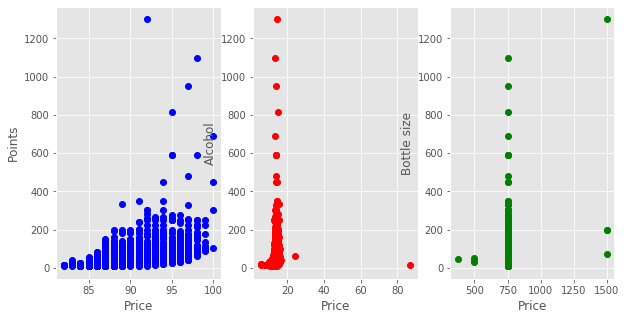

In [19]:
#Ploting the relationship between wine grade (points) and price 
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.plot(Clear_df['Points'], Clear_df['Price'],'bo')
plt.xlabel('Price')
plt.ylabel('Points')
plt.subplot(1,3,2)
plt.plot(Clear_df['Alcohol'], Clear_df['Price'],'ro')
plt.xlabel('Price')
plt.ylabel('Alcohol')
plt.subplot(1,3,3)
plt.plot(Clear_df['Bottle size'], Clear_df['Price'],'go')
plt.xlabel('Price')
plt.ylabel('Bottle size')
plt.show()

From the Figures above it is clear the existence of small correlation between 'Price' and 'Points'

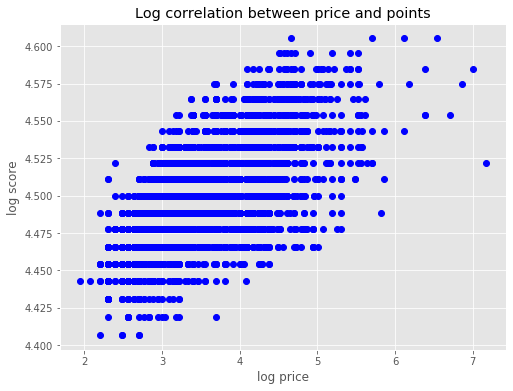

In [21]:
#After performing the log transformation 

log_score = np.log(Clear_df[['Price', 'Points']])
log_score = log_score.dropna().reset_index(drop=True)
log_score.columns = ['log_price', 'log_points']

plt.plot(log_score['log_price'], log_score['log_points'],'bo')
plt.title('Log correlation between price and points')
plt.xlabel('log price')
plt.ylabel('log score')
plt.show()

In [23]:
corr = np.corrcoef(Clear_df['Points'], Clear_df['Price'])
corr2 = np.corrcoef(log_score['log_points'], log_score['log_price'])
print('Data correlation coefficient: %.4f \nLog-data correlation coefficient: %.4f' % (corr[0][1], corr2[0][1]))

Data correlation coefficient: 0.4437 
Log-data correlation coefficient: 0.6223


Taking a look at our transformed data, it is clear by our graphs that there seems to be a relationship between price and wine score, overall. Aditionally, the correlation coefficient between the score recieved and the wine's price is  ρ=0.44 for our original data and  ρlog=0.62  for our transformed data.

### 3.1- Distribution of scores per price quartiles

In [25]:
# Price quartiles
quart1 = Clear_df[Clear_df.Price < Clear_df.Price.quantile(.25)].reset_index(drop=True)
quart2 = Clear_df[(Clear_df.Price < Clear_df.Price.quantile(.50)) & (Clear_df.Price >= Clear_df.Price.quantile(.25))].reset_index(drop=True)
quart3 = Clear_df[(Clear_df.Price < Clear_df.Price.quantile(.75)) & (Clear_df.Price >= Clear_df.Price.quantile(.50))].reset_index(drop=True)
quart4 = Clear_df[Clear_df.Price >= Clear_df.Price.quantile(.75)].reset_index(drop=True)


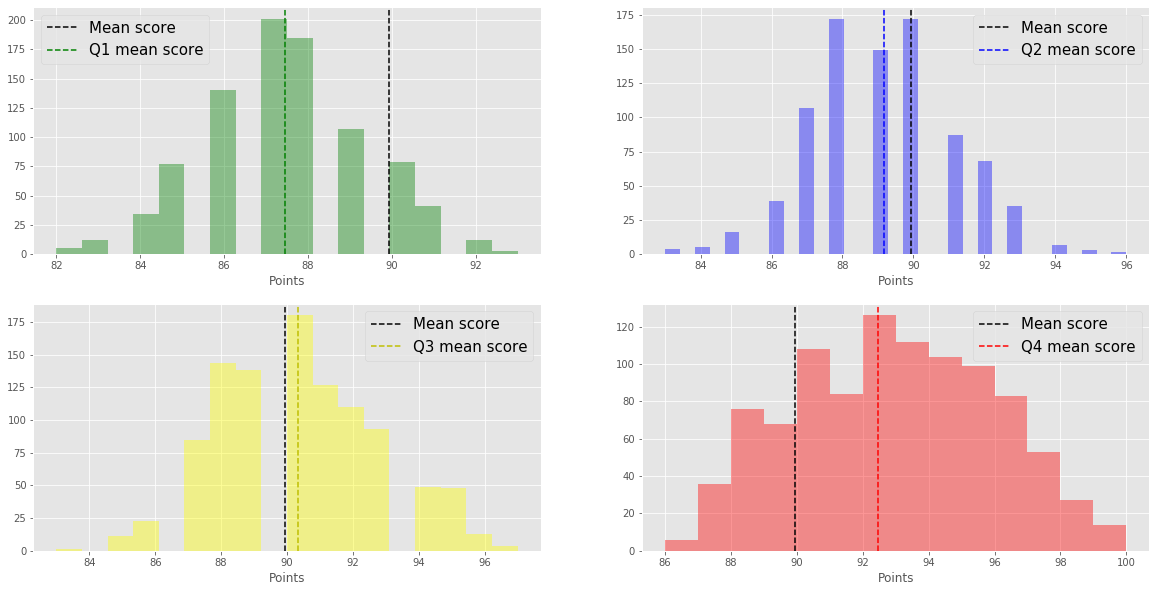

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot( quart1['Points'], color='green', kde=False)
plt.axvline(np.mean(Clear_df.Points), 0,1, linestyle='--', color='black', label='Mean score')
plt.axvline(np.mean(quart1.Points), 0,1, linestyle='--', color='green', label='Q1 mean score')
plt.legend(fontsize=15)

plt.subplot(2,2,2)
sns.distplot( quart2['Points'], color='blue', kde=False)
plt.axvline(np.mean(Clear_df.Points), 0,1, linestyle='--', color='black', label='Mean score')
plt.axvline(np.mean(quart2.Points), 0,1, linestyle='--', color='b', label='Q2 mean score')
plt.legend(fontsize=15)

plt.subplot(2,2,3)
sns.distplot(quart3['Points'], color='yellow', kde=False)
plt.axvline(np.mean(Clear_df.Points), 0,1, linestyle='--', color='black', label='Mean score')
plt.axvline(np.mean(quart3.Points), 0,1, linestyle='--', color='y', label='Q3 mean score')
plt.legend(fontsize=15)

plt.subplot(2,2,4)
sns.distplot( quart4['Points'], color='red', kde=False)
plt.axvline(np.mean(Clear_df.Points), 0,1, linestyle='--', color='black', label='Mean score')
plt.axvline(np.mean(quart4.Points), 0,1, linestyle='--', color='r', label='Q4 mean score')
plt.legend(fontsize=15)
plt.show()

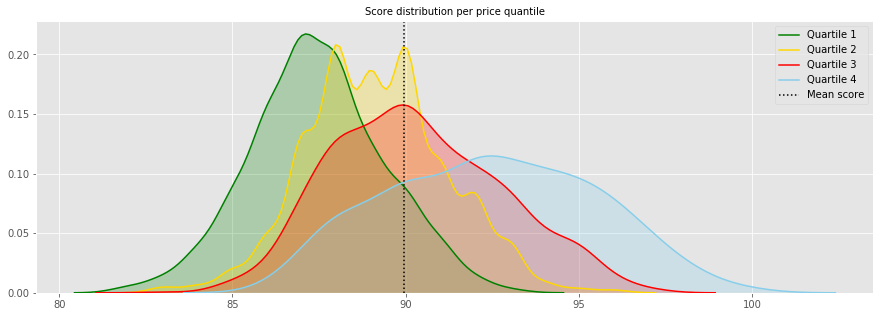

In [37]:
# Figure parameters
plt.figure(figsize=(15,5))
plt.title('Score distribution per price quantile', fontsize=10)
sns.kdeplot( quart1['Points'], color='green',   label='Quartile 1', shade=True)
sns.kdeplot( quart2['Points'], color='gold',    label='Quartile 2', shade=True)
sns.kdeplot( quart3['Points'], color='red',     label='Quartile 3', shade=True)
sns.kdeplot( quart4['Points'], color='skyblue', label='Quartile 4', shade=True)
plt.axvline(np.mean(Clear_df.Points), 0,1, linestyle=':', color='black', label='Mean score')
plt.legend(fontsize=10)
plt.show()

In [ ]:
# years=[]
# c=1
# for i, tit in enumerate(title) :
#     if '20' in tit or '199' in tit :
#         spl=tit.split(' ')
#         for j , check in enumerate(spl):
#             if '20' in check:
#                 years.append(check)
#     if '20' not in tit and '199' not in tit :
#         c=c+1
#         years.append(0)

In [ ]:
# import re

# for j, t in enumerate(title):
#     #re.findall(r"[0-9]+", t)[0]
#     print(re.findall(r"[0-9]+", t)[0])

### 3.2- Claculate the correlation between Price and Point for various variety and winery 

In [70]:
colum=['Designation', 'Region','Points', 'Price','Variety', 'Winery','Category' ]
NewItaly_wine=Clear_df[colum]
NewItaly_wine.head(5)

,Designation,Region,Points,Price,Variety,Winery,Category
0,NaN,Piedmont,95,50,Nebbiolo,Villa Guelpa,Red
1,Gallina,Piedmont,95,60,Nebbiolo,Ugo Lequio,Red
2,NaN,Piedmont,95,70,Nebbiolo,Villa Guelpa,Red
3,NaN,Piedmont,93,40,Nebbiolo,Torraccia del Piantavigna,Red
4,Tenuta Capofaro Didyme,Sicily & Sardinia,93,25,"Malvasia, Italian White",Tasca d'Almerita,White


In [71]:
Clear_df.columns

Index(['Description', 'Points', 'Title', 'Price', 'Designation', 'Variety',
       'Country', 'Winery', 'Taster', 'Alcohol', 'Bottle size', 'Category',
       'Importer', 'Date published', 'Region', 'City'],
      dtype='object')

In [72]:
regions=[c for c in Clear_df.Region.unique()]

In [73]:
# Claculate the correlation between prince and point for each province : 
Prov_wine=[NewItaly_wine[NewItaly_wine.Region==x] for x in regions]

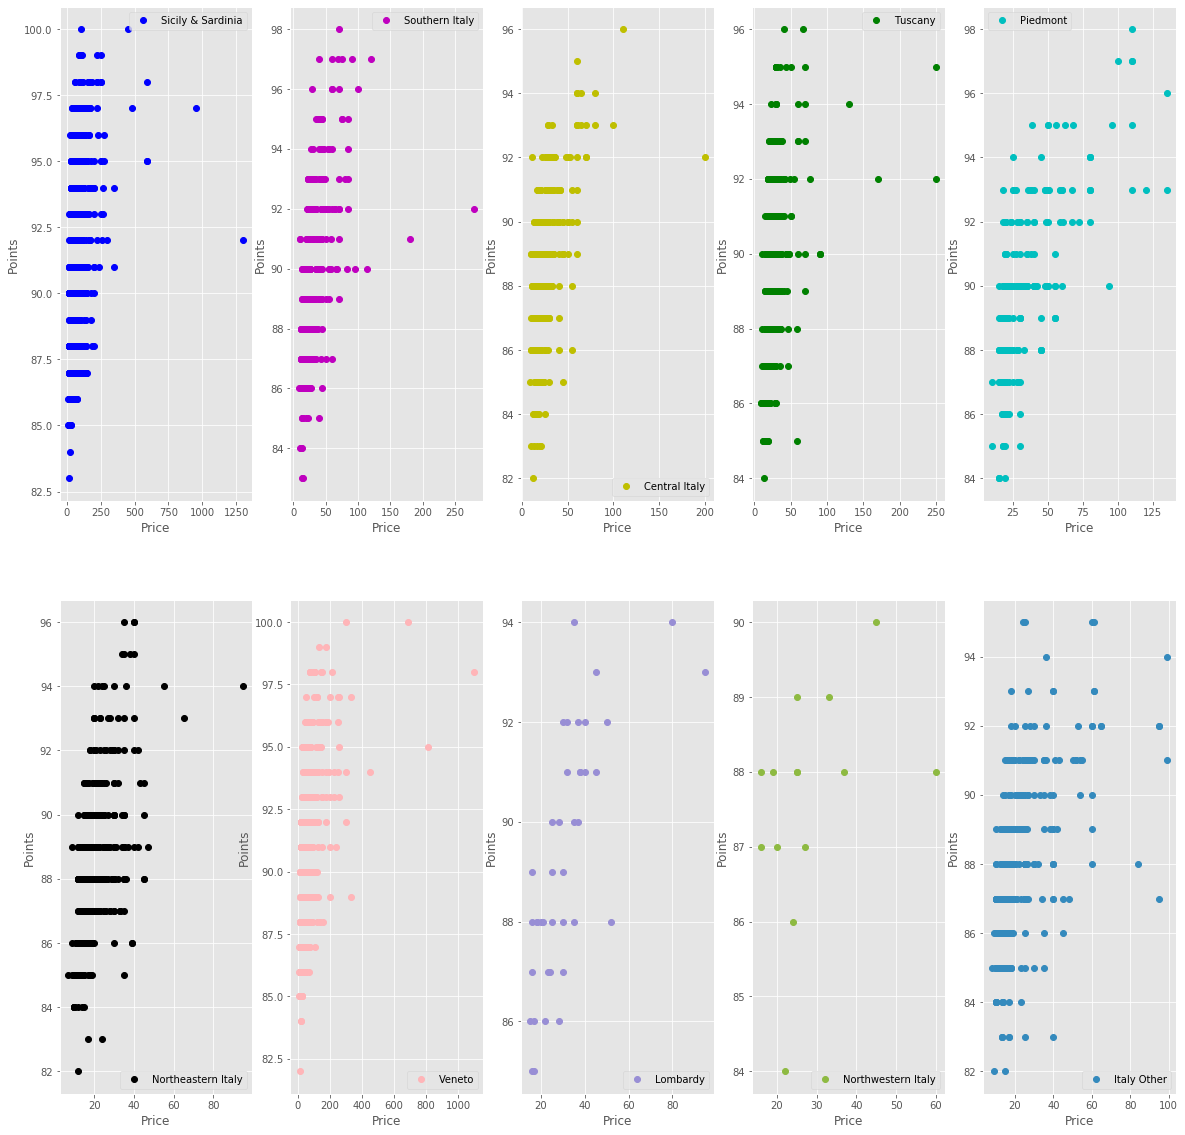

In [74]:
plt.figure(figsize=(20,20))
plt.subplot(2,5,1)
plt.plot(Prov_wine[0]['Price'], Prov_wine[0]['Points'],'bo', label='Sicily & Sardinia')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()

plt.subplot(2,5,2)
plt.plot(Prov_wine[1]['Price'], Prov_wine[1]['Points'],'mo', label='Southern Italy' )
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()

plt.subplot(2,5,3)
plt.plot(Prov_wine[2]['Price'], Prov_wine[2]['Points'],'yo', label='Central Italy')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()

plt.subplot(2,5,4)
plt.plot(Prov_wine[3]['Price'], Prov_wine[3]['Points'],'go',label='Tuscany')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()

plt.subplot(2,5,5)
plt.plot(Prov_wine[4]['Price'], Prov_wine[4]['Points'],'co', label='Piedmont')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()

plt.subplot(2,5,6)
plt.plot(Prov_wine[5]['Price'], Prov_wine[5]['Points'],'ko',label='Northeastern Italy')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()

plt.subplot(2,5,7)
plt.plot(Prov_wine[6]['Price'], Prov_wine[6]['Points'],'C6 o', label='Veneto')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()

plt.subplot(2,5,8)
plt.plot(Prov_wine[8]['Price'], Prov_wine[8]['Points'],'C9 o', label='Lombardy')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()


plt.subplot(2,5,9)
plt.plot(Prov_wine[9]['Price'], Prov_wine[9]['Points'],'C5 o', label='Northwestern Italy')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()


plt.subplot(2,5,10)
plt.plot(Prov_wine[7]['Price'], Prov_wine[7]['Points'],'C1 o', label='Italy Other')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()

plt.show()

In [75]:
corr_array= [np.corrcoef(Prov_wine[i]['Points'], Prov_wine[i]['Price'])[0][1] for i in range(len(Prov_wine))]
corr_array

[0.29166951325985857,
 0.4730909413203386,
 0.5281519837101593,
 0.3239840474006199,
 0.6541653092497319,
 0.5189162207037221,
 0.4857521896517046,
 0.5157053842280105,
 0.6885714780215303,
 0.39128363818160794]

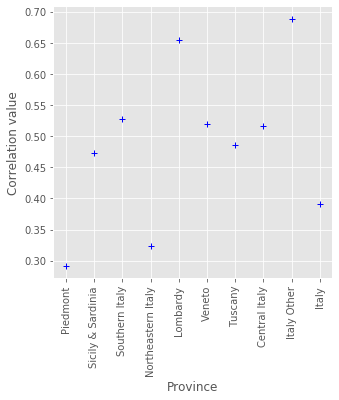

In [76]:
plt.figure(figsize=(5,5))
plt.plot(regions,corr_array,'b+')
plt.xticks(rotation=90)
plt.xlabel('Province')
plt.ylabel('Correlation value')
plt.show()

### 3.3-Performing log transformation 

To handle the outliers I had performed the log transformation 

In [77]:
log_score_NewItaly_wine = np.log(NewItaly_wine[['Price', 'Points']])
log_score_NewItaly_wine['Region']=NewItaly_wine.Region
log_score_NewItaly_wine = log_score_NewItaly_wine.dropna().reset_index(drop=True)
log_score_NewItaly_wine.columns = ['log_price', 'log_score','Region']
Log_province=[log_score_NewItaly_wine[log_score_NewItaly_wine.Region==x] for x in regions]

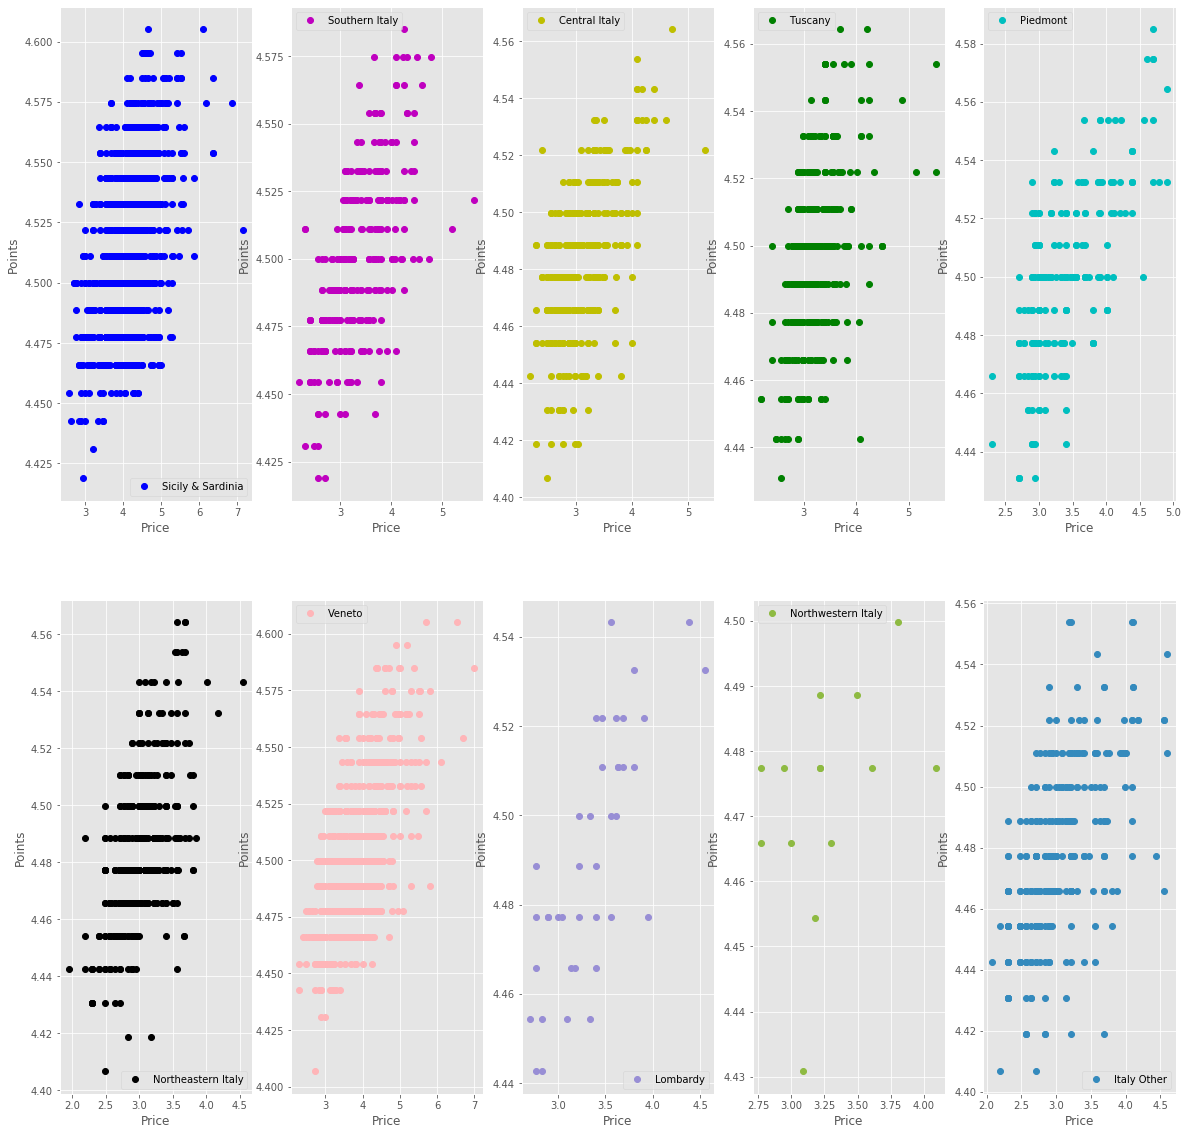

In [78]:
plt.figure(figsize=(20,20))
plt.subplot(2,5,1)
plt.plot(Log_province[0]['log_price'], Log_province[0]['log_score'],'bo', label='Sicily & Sardinia')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()


plt.subplot(2,5,2)
plt.plot(Log_province[1]['log_price'], Log_province[1]['log_score'],'mo', label='Southern Italy' )
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()


plt.subplot(2,5,3)
plt.plot(Log_province[2]['log_price'], Log_province[2]['log_score'],'yo', label='Central Italy')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()


plt.subplot(2,5,4)
plt.plot(Log_province[3]['log_price'], Log_province[3]['log_score'],'go',label='Tuscany')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()

plt.subplot(2,5,5)
plt.plot(Log_province[4]['log_price'], Log_province[4]['log_score'],'co', label='Piedmont')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()

plt.subplot(2,5,6)
plt.plot(Log_province[5]['log_price'], Log_province[5]['log_score'],'ko',label='Northeastern Italy')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()

plt.subplot(2,5,7)
plt.plot(Log_province[6]['log_price'], Log_province[6]['log_score'],'C6 o', label='Veneto')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()

plt.subplot(2,5,8)
plt.plot(Log_province[8]['log_price'], Log_province[8]['log_score'],'C9 o', label='Lombardy')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()

plt.subplot(2,5,9)
plt.plot(Log_province[9]['log_price'], Log_province[9]['log_score'],'C5 o', label='Northwestern Italy')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()

plt.subplot(2,5,10)
plt.plot(Log_province[7]['log_price'], Log_province[7]['log_score'],'C1 o', label='Italy Other')
plt.xlabel('Price')
plt.ylabel('Points')
plt.legend()

plt.show()

# 4- Regression algorithm application  
###### First we must map our Categorical data into numerical ones because most of algorithms does not support categorical data

In [79]:
aa=[c for c in NewItaly_wine['Designation'].unique()]
len(aa) #187

1865

In [80]:
# Mapping the variety column 
NewItaly_wine.Variety = pd.Categorical(NewItaly_wine.Variety)
NewItaly_wine['code_variety'] = NewItaly_wine.Variety.cat.codes

#Mapping the province column 
NewItaly_wine.Region = pd.Categorical(NewItaly_wine.Region)
NewItaly_wine['code_Region'] = NewItaly_wine.Region.cat.codes

#Mapping the winery column 
NewItaly_wine.Winery = pd.Categorical(NewItaly_wine.Winery)
NewItaly_wine['code_Winery'] = NewItaly_wine.Winery.cat.codes

#Mapping the Category column
NewItaly_wine.Category = pd.Categorical(NewItaly_wine.Category)
NewItaly_wine['code_Category'] = NewItaly_wine.Category.cat.codes
NewItaly_wine.head(5)

C:\Users\bmakh\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\bmakh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\bmakh\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,Designation,Region,Points,Price,Variety,Winery,Category,code_variety,code_Region,code_Winery,code_Category
0,NaN,Piedmont,95,50,Nebbiolo,Villa Guelpa,Red,51,5,1094,1
1,Gallina,Piedmont,95,60,Nebbiolo,Ugo Lequio,Red,51,5,1058,1
2,NaN,Piedmont,95,70,Nebbiolo,Villa Guelpa,Red,51,5,1094,1
3,NaN,Piedmont,93,40,Nebbiolo,Torraccia del Piantavigna,Red,51,5,1042,1
4,Tenuta Capofaro Didyme,Sicily & Sardinia,93,25,"Malvasia, Italian White",Tasca d'Almerita,White,43,6,969,4


In [81]:
master_table=NewItaly_wine[['Points' , 'code_variety','code_Region', 'code_Winery', 'code_Category','Price']]

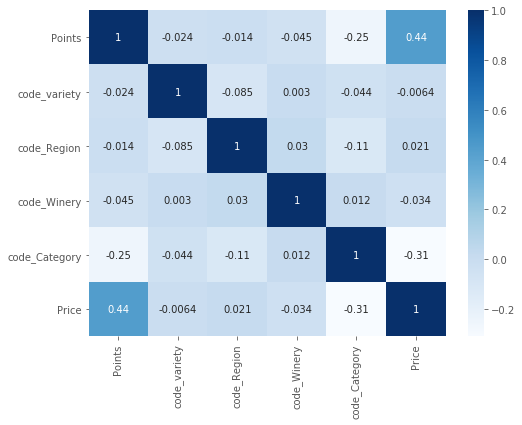

In [82]:
# master_table correlation matrix 
# calculate the correlation matrix
corr = master_table.corr()
# plot the heatmap
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns, annot=True, cmap= 'Blues')

In [83]:
y=master_table['Price']
X=master_table
del X['Price']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # I had deleted all nan values 

#### 4.1- Decision tree regression 

In [94]:
parameters={"splitter":["best","random"],"max_depth" : [1,3,5,7,9,11,12],"min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],"max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [95]:
rand_search1=RandomizedSearchCV(DecisionTreeRegressor(), parameters, n_jobs=-1,cv=5, scoring='neg_root_mean_squared_error')
rand_search1.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [97]:
best_parm=rand_search1.best_params_
best_DT=DecisionTreeRegressor(splitter=best_parm['splitter'], max_depth=best_parm['max_depth'], 
                              min_samples_leaf=best_parm['min_samples_leaf'], min_weight_fraction_leaf=best_parm['min_weight_fraction_leaf'],
                              max_features=best_parm['max_features'], max_leaf_nodes=best_parm['max_leaf_nodes'], random_state=42)

In [99]:
best_DT.fit(X_train, y_train)
y_pred=best_DT.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms

47.65011615128032

#### 4.2- Linear regression 

In [101]:
lr = LinearRegression().fit(X_train,y_train)
Pred_lr_test=lr.predict(X_test)
MSE_Test= np.sqrt(mean_squared_error(y_test,Pred_lr_test ))
MSE_Test

40.84164879581594

#### 4.3- Random Forest 

In [107]:
parameters1={'max_depth': [5, 6, 7],'n_estimators': [10, 50, 100, 400]}
rand_search2 = RandomizedSearchCV(RandomForestRegressor(),parameters1,cv=5, 
                         scoring='neg_root_mean_squared_error', verbose=0,n_jobs=-1)
rand_search2.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [112]:
best_parm2=rand_search2.best_params_
best_RF=RandomForestRegressor(n_estimators=best_parm2['n_estimators'],max_depth=best_parm2['max_depth'], random_state=42)

In [113]:
best_RF.fit(X_train, y_train)
y_pred2=best_RF.predict(X_test)
rms2 = np.sqrt(mean_squared_error(y_test, y_pred2))
rms2

38.0737712863378

In [116]:
#!python -m pip install wordcloud

## Word cloud

In [117]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 
from PIL import Image 

In [120]:
# Score quartiles

score_quart4 = Clear_df[Clear_df.Points >= Clear_df.Points.quantile(.75)].reset_index(drop=True)


score_quart3 = Clear_df[(Clear_df.Points < Clear_df.Points.quantile(.75)) & (Clear_df.Points >= Clear_df.Points.quantile(.50))].reset_index(drop=True)


score_quart2 = Clear_df[(Clear_df.Points < Clear_df.Points.quantile(.50)) & (Clear_df.Points >= Clear_df.Points.quantile(.25))].reset_index(drop=True)


score_quart1 = Clear_df[Clear_df.Points < Clear_df.Points.quantile(.25)].reset_index(drop=True)

# Price quantiles were defined previously

In [123]:
# Wine descriptions by PRICE
Clear_df.Description 
stopwords = set(STOPWORDS)

# We remove words that are common among all descriptions, in order to see if there is one characteristic
# that differentiates these wines
stopwords.update(["drink", "now", "wine", "flavor", "flavors", "aroma", "aromas", "blend", "note", "notes", "given", 
                  "expression", "first", "offers", "raisin", "Made"])

mask=np.array(Image.open("twitter_mask.png"))

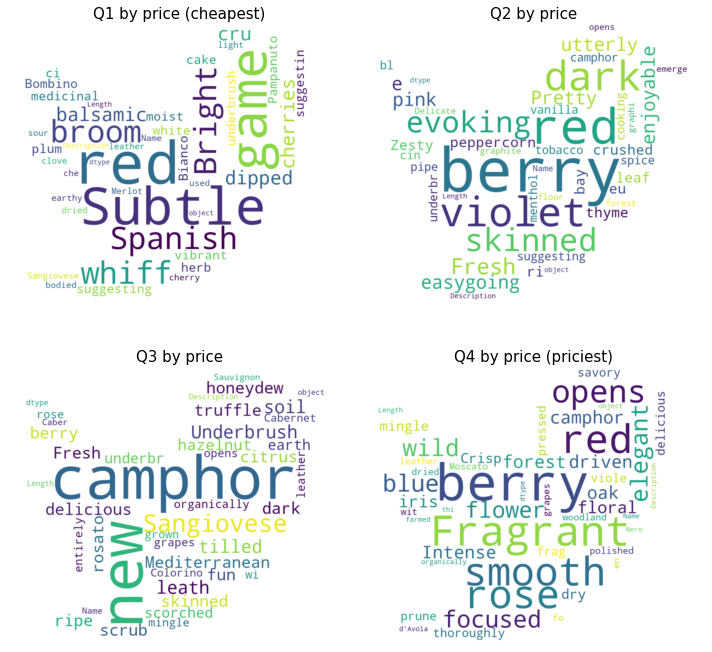

In [125]:
# Figures

plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.title('Q1 by price (cheapest)', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, mask=mask, background_color='white').generate(str(score_quart1.Description))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

#------

plt.subplot(2, 2, 2)
plt.title('Q2 by price', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, mask=mask, background_color='white').generate(str(score_quart2.Description))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#------


plt.subplot(2, 2, 3)
plt.title('Q3 by price', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, mask=mask, background_color='white').generate(str(score_quart3.Description))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#------

plt.subplot(2, 2, 4)
plt.title('Q4 by price (priciest)', fontsize=15)
wordcloud = WordCloud(stopwords=stopwords, mask=mask, background_color='white').generate(str(score_quart4.Description))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()

plt.show()
